# Options 1

This notebook shows payoff functions and pricing bounds of options.

## Load Packages and Extra Functions

In [1]:
using Dates

include("jlFiles/printmat.jl")

printwhere (generic function with 1 method)

In [2]:
using Plots, LaTeXStrings

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :svg)

# Payoffs and Profits of Options

Let $K$ be the strike price and $S_m$ the price of the underlying at expiration of the option contract. 

The call and put profits (at expiration) are

$\text{call profit}_{m}\ = \max\left(  0,S_{m}-K\right) - e^{my}C$

$\text{put profit}_{m}=\max\left(  0,K-S_{m}\right)  - e^{my}P $,

where $C$ and $P$ are the call and put option prices (paid today).

The profit of a straddle is the sum of those of a call and a put.

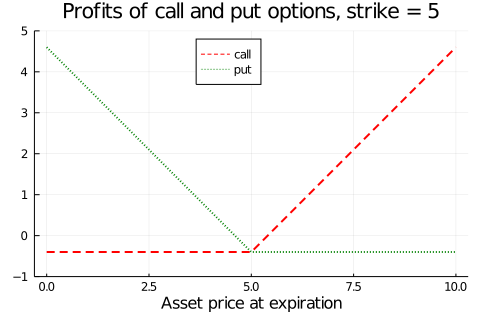

In [3]:
Sₘ = 0:0.1:10          #possible values of underlying at expiration
K  = 5                 #strike price
C  = 0.4               #call price (just a number that I made up)
P  = 0.4               #put price 
(y,m) = (0,1)          #zero interest to keep it simple

CallProfit = max.(0,Sₘ.-K) .- exp(m*y)*C
PutProfit  = max.(0,K.-Sₘ) .- exp(m*y)*P

p1 = plot( Sₘ,[CallProfit PutProfit],
           linecolor = [:red :green],
           linestyle = [:dash :dot],
           linewidth = 2,
           label = ["call" "put"],
           ylim = (-1,5),
           legend = :top,
           title = "Profits of call and put options, strike = $K",
           xlabel = "Asset price at expiration" )
display(p1)

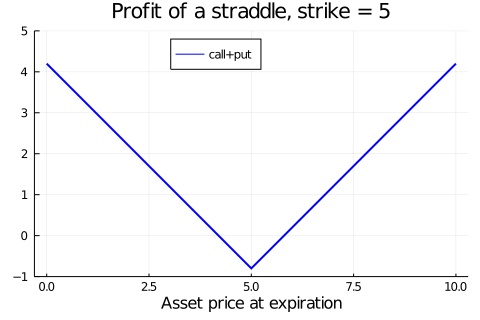

In [4]:
StraddleProfit = CallProfit + PutProfit

p1 = plot( Sₘ,StraddleProfit,
           linecolor = :blue,
           linewidth = 2,
           label = "call+put",
           ylim = (-1,5),
           legend = :top,
           title = "Profit of a straddle, strike = $K",
           xlabel = "Asset price at expiration" )
display(p1)

# Put-Call Parity for European Options

A no-arbitrage condition says that 
$
C-P=e^{-my}(F-K)
$
must hold, where $F$ is the forward price. This is the *put-call parity*.

When the underlying asset has no dividends (until expiration of the option), then the forward-spot parity says that $F=e^{my}S$.

In [5]:
S = 42                     #current price of underlying etc
K = 38
m = 0.5
y = 0.05

C = 5.5                   #assume this is the price of a call option(K)

F = exp(m*y)*S            #forward-spot parity
P = C - exp(-m*y)*(F.-K)

printlnPs("C and P (for the same strike price) are: ",C,P)

C and P (for the same strike price) are:      5.500     0.562


# Pricing Bounds

The pricing bounds for (American and European) call options are

$\begin{align}
C  &  \leq e^{-my}F\\
C  &  \geq\max[0,e^{-my}(F-K)]
\end{align}$

The pricing bounds for (European) put options are

$\begin{align}
P_{E}  &  \leq e^{-my}K\\
e^{-my}(K-F)  &  \leq P_{E}
\end{align}$

In [6]:
S = 42
m = 0.5
y = 0.05

F = exp(m*y)*S

K = 38

C_Upper = exp(-m*y)*F
C_Lower = max.(0,exp(-m*y)*(F.-K))

printlnPs("Pricing bounds for European call option with strike $K",C_Lower,C_Upper)

Pricing bounds for European call option with strike 38     4.938    42.000


In [7]:
K_range = 30:0.5:50             #pricing bounds for many strike prices
n = length(K_range)

C_Upper = exp(-m*y)*F
C_Lower = max.(0,exp(-m*y)*(F.-K_range))

P_Upper = exp(-m*y)*K_range
P_Lower = max.(0,exp(-m*y)*(K_range.-F));

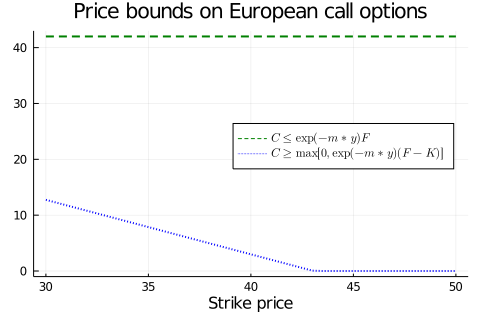

In [8]:
p1 = plot( K_range,[C_Upper*ones(n) C_Lower],
           linecolor = [:green :blue],
           linewidth = 2,
           linestyle = [:dash :dot],
           label = [L"C \leq \exp(-m*y)F " L"C \geq \max[0,\exp(-m*y)(F-K)]"],
           ylim = (-1,S+1),
           legend = :right,
           title = "Price bounds on European call options",
           xlabel = "Strike price" )
display(p1)

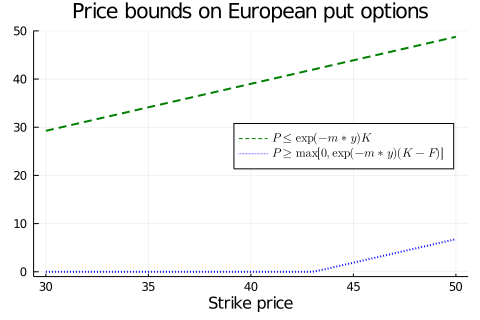

In [9]:
p1 = plot( K_range,[P_Upper P_Lower],
           linecolor = [:green :blue],
           linewidth = 2,
           linestyle = [:dash :dot],
           label = [L" P \leq \exp(-m*y)K " L" P \geq \max[0,\exp(-m*y)(K-F)]  "],
           ylim = (-1,50),
           legend = :right,
           title = "Price bounds on European put options",
           xlabel = "Strike price" )
display(p1)